In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

ex 9.1
---

As sample size increases, the power of a hypothesis test increases, which means it is more likely to be positive if the effect is real.

Conversely, as sample size decreases, the test is less likely to be positive even
if the effect is real.

To investigate this behavior, run the tests in this chapter with different subsets of the NSFG data.

In [2]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]
df = df[df['outcome']==1]
df = df.dropna()

In [22]:
def nullHypothesis(series1,series2):
    pooled = np.hstack((series1,series2))
    np.random.shuffle(pooled)
    return pooled[:len(series1)],pooled[len(series1):]

def p_value(xs,ys,iterations=1000):
    diff = []
    mean = abs(np.mean(xs)-np.mean(ys))
    for _ in range(iterations):
        group1,group2= nullHypothesis(xs,ys)
        mean_diff = abs(np.mean(group1) - np.mean(group2))
        diff.append(mean_diff)
    occurence = len([x for x in diff if x>=mean])
    return occurence/iterations

In [23]:
first_babies = df[df['birthord']==1]['prglngth']
other_babies = df[df['birthord']!=1]['prglngth']
p_value(first_babies,other_babies)

0.195

In [5]:
np.mean(first_babies) - np.mean(other_babies)

-0.12476118453549034

In [6]:
sample_sizes = (np.linspace(start=1,stop=len(first_babies),num=10,dtype=np.int16))
p_values = []
for size in sample_sizes:
    sample1 = np.random.choice(first_babies,size=size,replace=False)
    sample2 = np.random.choice(other_babies,size=size,replace=False)
    p_values.append(p_value(sample1,sample2))  

Text(0.5,0,'Sample size')

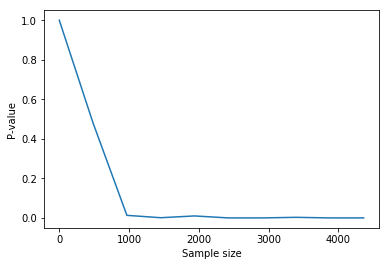

In [7]:
plt.plot(sample_sizes,p_values)
plt.ylabel('P-value')
plt.xlabel('Sample size')

test1: difference in mean pregnancy length
test2: difference in mean birth weight
test3: correlation of mother's age and birth weight
test4: chi-square test of pregnancy length

tests that are positive with large sample sizes become negative as we take away data

In a positive hypothesis test a person generates or examines evidence that is expected to have the property of interest if the hypothesis is correct, whereas in a negative hypothesis test a person generates or examines evidence that is not expected to have the property of interest if the hypothesis is correct

ex 9.2
---

we simulated the null hypothesis by permutation; that is, we treated the observed values as if they represented the entire
population, and randomly assigned the members of the population to the
two groups

An alternative is to use the sample to estimate the distribution for the population, then draw a random sample from that distribution. This process is
called resampling.

There are several ways to implement resampling, but
one of the simplest is to draw a sample with replacement from the observed
values.

In [26]:
def null_hypothesis_resample(xs,ys):
    pooled = np.hstack((xs,ys))
    sample1 = np.random.choice(pooled,size=len(xs),replace=True)
    sample2 = np.random.choice(pooled,size=len(ys),replace=True)
    
    return sample1,sample2

Use this model to test the differences in pregnancy length and birth weight.
How much does the model affect the results?

In [27]:
# difference in prglength
def p_value_resample(xs,ys,iterations=1000):
    diff = []
    mean = abs(np.mean(xs)-np.mean(ys))
    for _ in range(iterations):
        group1,group2 = null_hypothesis_resample(xs,ys)
        mean_diff = abs(np.mean(group1) - np.mean(group2))
        diff.append(mean_diff)
    occurence = len([x for x in diff if x>=mean])
    return occurence/iterations

x1 = df[df['birthord']==1]['prglngth']
x2 = df[df['birthord']!=1]['prglngth']

p_value_resample(x1,x2),p_value(x1,x2)

(0.175, 0.203)

In [28]:
y1 = df[df['birthord']==1]['totalwgt_lb']
y2 = df[df['birthord']!=1]['totalwgt_lb']
p_value_resample(y1,y2),p_value(y1,y2)

(0.0, 0.0)

As we can see there is no significant difference between the two null hypothesis model.

however, different models can yield very different results